In [1]:
# genera un numero reale in un intervallo tra due numeri reali con un simulatore ideale

from qiskit_aer import AerSimulator
from qiskit import QuantumCircuit
import numpy as np
from qiskit.visualization import plot_histogram
from qiskit.quantum_info import Statevector
import matplotlib.pyplot as plt
import math
import scipy

# input
a = float(input('inserisci l\'estremo sx dell\'intervallo\' (reale) : \n'))
b = float(input('inserisci l\'estremo dx dell\'intervallo\'(reale) : \n'))
d = float(input('inserisci l\'errore massimo desiderato ( < b-a ) : \n'))

# vettore di precisione
num_bit = math.ceil(math.log2((b-a)/d+1)) # math.ceii = parte intera +1 se x non è intero, x se è intero
p = [(1/2)**i for i in range(1,num_bit+1)] # num_bit+1 perchè range si ferma all'ultimo-1
# avere 0 è inutile , mi da due volte stessi valori,
# così come -1 mi da due volte stessi valori in modulo quindi lo escludo

# creazione del circuito
qc = QuantumCircuit(num_bit)
for i in range(num_bit) : # i = riga del circuito
    qc.h(i)

# statevector
state = Statevector.from_instruction(qc) 
print("Statevector:", state) # Print the statevector
probs = state.probabilities_dict() # Get the probabilities of each state
plot_histogram(probs)
plt.show()

qc.measure_all()
print(qc)

Statevector: Statevector([0.1767767+0.j, 0.1767767+0.j, 0.1767767+0.j, 0.1767767+0.j,
             0.1767767+0.j, 0.1767767+0.j, 0.1767767+0.j, 0.1767767+0.j,
             0.1767767+0.j, 0.1767767+0.j, 0.1767767+0.j, 0.1767767+0.j,
             0.1767767+0.j, 0.1767767+0.j, 0.1767767+0.j, 0.1767767+0.j,
             0.1767767+0.j, 0.1767767+0.j, 0.1767767+0.j, 0.1767767+0.j,
             0.1767767+0.j, 0.1767767+0.j, 0.1767767+0.j, 0.1767767+0.j,
             0.1767767+0.j, 0.1767767+0.j, 0.1767767+0.j, 0.1767767+0.j,
             0.1767767+0.j, 0.1767767+0.j, 0.1767767+0.j, 0.1767767+0.j],
            dims=(2, 2, 2, 2, 2))
        ┌───┐ ░ ┌─┐            
   q_0: ┤ H ├─░─┤M├────────────
        ├───┤ ░ └╥┘┌─┐         
   q_1: ┤ H ├─░──╫─┤M├─────────
        ├───┤ ░  ║ └╥┘┌─┐      
   q_2: ┤ H ├─░──╫──╫─┤M├──────
        ├───┤ ░  ║  ║ └╥┘┌─┐   
   q_3: ┤ H ├─░──╫──╫──╫─┤M├───
        ├───┤ ░  ║  ║  ║ └╥┘┌─┐
   q_4: ┤ H ├─░──╫──╫──╫──╫─┤M├
        └───┘ ░  ║  ║  ║  ║ └╥┘
meas: 5/════════

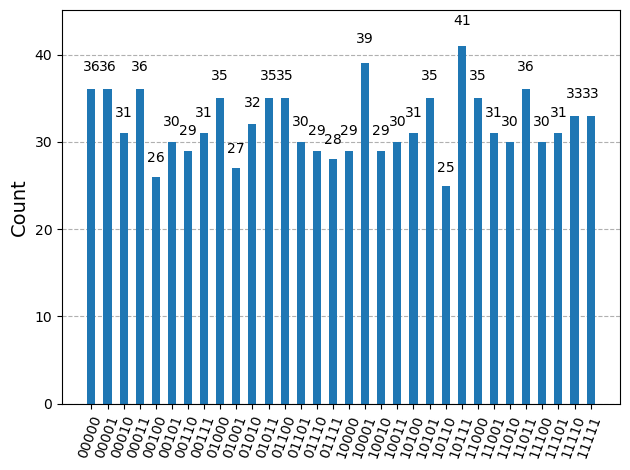

DescribeResult(nobs=np.int64(32), minmax=(np.int64(25), np.int64(41)), mean=np.float64(32.0), variance=np.float64(13.806451612903226), skewness=np.float64(0.3603200587307571), kurtosis=np.float64(-0.3133024718316011))
numero casuale reale tra 0.0 e 10.0: 5.483870967741935


In [ ]:
%matplotlib inline

# simulatore
simulator = AerSimulator(method='statevector') # NON facciamo traspilazione

# risultato di una misurazione (non importa fare shot perchè gia conosco la prob dallo statevector)
result = simulator.run(qc, shots=1024).result() 

# grafico dei counts
counts = result.get_counts()  # Get measurement counts 
plot_histogram(counts)
plt.show()
# analisi statistica di counts.values() : 
valori_int = [int(v) for v in counts.values()]
print(scipy.stats.describe(valori_int))

# per ottenere il vettore binario misurato (conversione in decimale del primo numero generato nei 1024 shots)
bit_string = list(result.get_counts().keys())[0] # dict_key -> lista con un solo elemento che è una stringa -> ne prendo il primo elemento che è una stringa
# in bit_strign ho le configurazioni binarie che sono uscite nei tot shots fatti,
#  con [0] prendo la prima ed è casuale la prima configurazione ottenuta dalla misurazione
numero_binario = [int(b) for b in bit_string] # stringa -> lista di interi (non posso farlo in place perchè stringa è immutabile)
# per ottenere numero reale nell'intervallo [0,sum(p)]
numero_reale = np.dot(p, numero_binario )
# riportiamo nell'intervallo (a,b)
numero_reale = (numero_reale * 1/sum(p))*(b-a)
numero_reale = numero_reale+a
print(f'numero casuale reale tra {a} e {b}: {numero_reale}')


In [3]:
from itertools import product
# partiamo da 1 perchè altrimenti p = [0,1/2,...] avrei p * [0,1,....] = 0 + 1/2+ ... e anche p * [1,1,....] = 0 +1/2......
print('p : \n',p)
# prodotto tra p e qualsiasi vettore binario di dim = dim(p)
risultati = {}
prodotto=[]
k=0
for bits in product([0, 1], repeat=num_bit):
    print(bits)
    prod = np.dot(p,bits)
    risultati[''.join(map(str, bits))] = prod
    prodotto.append(prod)
    print(prodotto)
    if (k>1) :
        print(float(prodotto[k])-float(prodotto[k-1]))
    k = k+1

# riportiamo i valori in prodotto tra 0 e 1
somma = sum(p)
for i in range(len(prodotto)) :
    prodotto[i] = float (prodotto[i]*1/somma)
    #
    if (i>1) :
        print(float(prodotto[i])-float(prodotto[i-1]))
    #
# per riportarlo nell'intervallo (a,b)
for i in range(len(prodotto)) :
    prodotto[i] = float (prodotto[i]*1/somma)

#prova per la distanza (stampa tutti i valori generabili )
print('numeri : \n') 
num = 0
# num_0 = 0
print('0')
for i in range(1,2**num_bit) : #  2^m-1 somme
    print('i : ',i)
    # num_0 = num_0 + d
    # print(num_0)
    num = num + (b-a)/(2**(num_bit)-1)
    print(num)
print ('(b-a)/(2**(num_bit)-1) : \n',(b-a)/(2**(num_bit)-1))

p : 
 [0.5, 0.25, 0.125, 0.0625, 0.03125]
(0, 0, 0, 0, 0)
[np.float64(0.0)]
(0, 0, 0, 0, 1)
[np.float64(0.0), np.float64(0.03125)]
(0, 0, 0, 1, 0)
[np.float64(0.0), np.float64(0.03125), np.float64(0.0625)]
0.03125
(0, 0, 0, 1, 1)
[np.float64(0.0), np.float64(0.03125), np.float64(0.0625), np.float64(0.09375)]
0.03125
(0, 0, 1, 0, 0)
[np.float64(0.0), np.float64(0.03125), np.float64(0.0625), np.float64(0.09375), np.float64(0.125)]
0.03125
(0, 0, 1, 0, 1)
[np.float64(0.0), np.float64(0.03125), np.float64(0.0625), np.float64(0.09375), np.float64(0.125), np.float64(0.15625)]
0.03125
(0, 0, 1, 1, 0)
[np.float64(0.0), np.float64(0.03125), np.float64(0.0625), np.float64(0.09375), np.float64(0.125), np.float64(0.15625), np.float64(0.1875)]
0.03125
(0, 0, 1, 1, 1)
[np.float64(0.0), np.float64(0.03125), np.float64(0.0625), np.float64(0.09375), np.float64(0.125), np.float64(0.15625), np.float64(0.1875), np.float64(0.21875)]
0.03125
(0, 1, 0, 0, 0)
[np.float64(0.0), np.float64(0.03125), np.float64(